In [2]:
import numpy as np

# Parameters for the Asian option
S0 = 100      # initial stock price
K = 110       # strike price
T = 1         # time to maturity in years
r = 0.05      # risk-free interest rate
sigma = 0.2   # volatility of the underlying asset
n_simulations = 10000  # number of Monte Carlo simulations
n_steps = 252          # number of steps in the averaging period (daily averaging)

# Function to simulate the average price paths
def simulate_average_price_paths(S0, K, T, r, sigma, n_simulations, n_steps):
    dt = T / n_steps
    price_paths = np.zeros((n_simulations, n_steps))
    average_prices = np.zeros(n_simulations)
    
    # Simulate price paths
    for i in range(n_simulations):
        prices = [S0]
        for j in range(1, n_steps):
            Z = np.random.normal()
            S_t = prices[j-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)
            prices.append(S_t)
        price_paths[i] = prices
        average_prices[i] = np.mean(prices)
    
    return average_prices

# Calculate the Asian option price using Monte Carlo simulation
def asian_option_price(S0, K, T, r, sigma, n_simulations, n_steps, option_type='call'):
    # Simulate the average price paths
    average_prices = simulate_average_price_paths(S0, K, T, r, sigma, n_simulations, n_steps)
    
    # Calculate payoffs based on option type
    if option_type.lower() == 'call':
        payoffs = np.maximum(average_prices - K, 0)
    elif option_type.lower() == 'put':
        payoffs = np.maximum(K - average_prices, 0)
    else:
        raise ValueError("option_type should be either 'call' or 'put'")
    
    # Discount payoffs back to present value
    discounted_payoffs = np.exp(-r * T) * payoffs
    
    # Calculate the option price as the average of the discounted payoffs
    option_price = np.mean(discounted_payoffs)
    
    return option_price

# Calculate the price of an Asian call option
asian_call_price = asian_option_price(S0, K, T, r, sigma, n_simulations, n_steps, option_type='put')
print(f"The estimated price of the Asian call option is: {asian_call_price:.2f}")

The estimated price of the Asian call option is: 9.07


In [3]:
t = simulate_average_price_paths(S0, K, T, r, sigma, n_simulations, n_steps) 

In [6]:
import numpy as np

# Parameters for the Asian option
S0 = 100      # initial stock price
K = 110       # strike price
T = 1         # time to maturity in years
r = 0.05      # risk-free interest rate
sigma = 0.2   # volatility of the underlying asset
n_simulations = 10000  # number of Monte Carlo simulations
n_steps = 252          # number of steps in the averaging period (daily averaging)

# Function to simulate the average price paths
def simulate_average_price_paths(S0, K, T, r, sigma, n_simulations, n_steps):
    dt = T / n_steps
    price_paths = np.zeros((n_simulations, n_steps))
    average_prices = np.zeros(n_simulations)
    
    # Simulate price paths
    for i in range(n_simulations):
        prices = [S0]
        for j in range(1, n_steps):
            Z = np.random.normal()
            S_t = prices[j-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)
            prices.append(S_t)
        price_paths[i] = prices
        average_prices[i] = np.mean(prices)
    
    return price_paths

In [7]:
price_paths = simulate_average_price_paths(S0, K, T, r, sigma, n_simulations, n_steps) 

In [17]:
price_paths[9999]

113.05254719514768

In [24]:
import numpy as np

# Parameters for the cliquet option
S0 = 100        # initial stock price
T = 1           # time to maturity in years
r = 0.05        # risk-free interest rate
sigma = 0.2     # volatility of the underlying asset
n_simulations = 10000  # number of Monte Carlo simulations
n_periods = 12         # number of periods (e.g., monthly resets)
global_cap = 0.1       # global cap for each period
global_floor = -0.1    # global floor for each period

# Function to simulate the underlying asset price paths
def simulate_price_paths(S0, T, r, sigma, n_simulations, n_periods):
    dt = T / n_periods
    price_paths = np.zeros((n_simulations, n_periods + 1))
    price_paths[:, 0] = S0
    
    for t in range(1, n_periods + 1):
        Z = np.random.standard_normal(n_simulations)
        price_paths[:, t] = price_paths[:, t-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)
    
    return price_paths

# Calculate the cliquet option price using Monte Carlo simulation
def cliquet_option_price(S0, T, r, sigma, n_simulations, n_periods, global_cap, global_floor):
    # Simulate the price paths
    price_paths = simulate_price_paths(S0, T, r, sigma, n_simulations, n_periods)
    
    # Calculate the returns for each period and apply the caps and floors
    returns = np.diff(price_paths, axis=1) / price_paths[:, :-1]
    returns = np.clip(returns, global_floor, global_cap)
    
    # Calculate the total return from all periods
    total_returns = np.sum(returns, axis=1)
    
    # Discount the total return back to present value
    discounted_payoff = np.exp(-r * T) * (1 + total_returns)
    
    # Calculate the option price as the average of the discounted payoffs
    option_price = np.mean(discounted_payoff) - 1  # subtracting 1 to get the excess return
    
    return option_price

# Calculate the price of the cliquet option
cliquet_option_price = cliquet_option_price(S0, T, r, sigma, n_simulations, n_periods, global_cap, global_floor)
print(f"The estimated price of the cliquet option is: {cliquet_option_price:.2f}")

The estimated price of the cliquet option is: -0.01


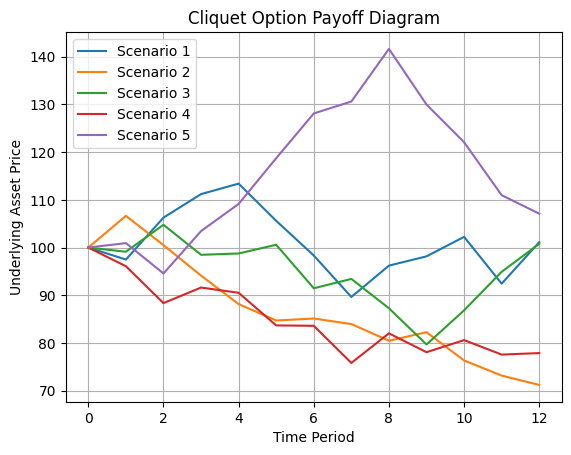

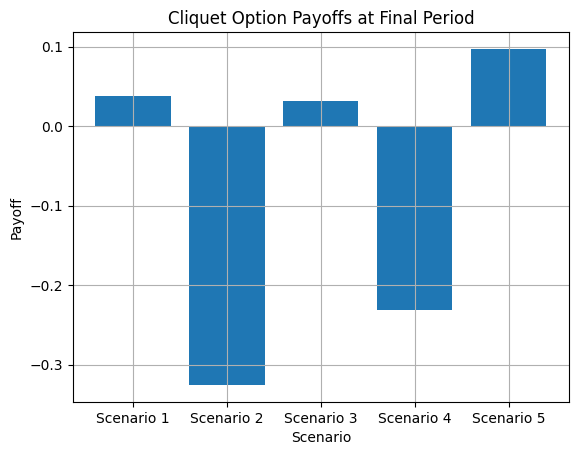

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the cliquet option
initial_price = 100
n_periods = 12
global_cap = 0.1
global_floor = -0.1
n_scenarios = 5

# Simulate different scenarios for the underlying asset's price movement
np.random.seed(42)  # For reproducibility
price_scenarios = np.zeros((n_scenarios, n_periods + 1))
price_scenarios[:, 0] = initial_price

for i in range(n_scenarios):
    for t in range(1, n_periods + 1):
        # Simulate a random return for each period
        period_return = np.random.uniform(global_floor, global_cap)
        price_scenarios[i, t] = price_scenarios[i, t-1] * (1 + period_return)

# Calculate the cliquet option payoff for each scenario
cliquet_payoffs = np.zeros(n_scenarios)
for i in range(n_scenarios):
    # Calculate the returns for each period and apply the caps and floors
    returns = np.diff(price_scenarios[i]) / price_scenarios[i][:-1]
    cliquet_payoffs[i] = np.sum(np.clip(returns, global_floor, global_cap))

# Plot the payoff diagram
for i in range(n_scenarios):
    plt.plot(price_scenarios[i], label=f'Scenario {i+1}')

plt.title('Cliquet Option Payoff Diagram')
plt.xlabel('Time Period')
plt.ylabel('Underlying Asset Price')
plt.legend()
plt.grid(True)
plt.show()

# Plot the payoffs at the final time period
final_prices = price_scenarios[:, -1]
plt.bar(range(1, n_scenarios + 1), cliquet_payoffs, tick_label=[f'Scenario {i+1}' for i in range(n_scenarios)])
plt.title('Cliquet Option Payoffs at Final Period')
plt.xlabel('Scenario')
plt.ylabel('Payoff')
plt.grid(True)
plt.show()